

# Question 5.2.2

In [1]:
import scipy.io
import numpy as np
import pandas as pd
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import normalize

In [2]:
img_data = scipy.io.loadmat('DrivFace/DrivFace.mat')
drivFaceData = img_data['drivFaceD'][0]

In [3]:
X_raw = img_data['drivFaceD'][0][0][0]
print(X_raw.shape)

(606, 6400)


In [4]:
label_data = pd.read_csv("DrivFace/drivPoints.txt")

In [5]:
print(label_data.head(5))

                  fileName  subject  imgNum  label  ang   xF   yF   wF   hF  \
0  20130529_01_Driv_001_f         1       1      2    0  292  209  100  112   
1  20130529_01_Driv_002_f         1       2      2    0  286  200  109  128   
2  20130529_01_Driv_003_f         1       3      2    0  290  204  105  121   
3  20130529_01_Driv_004_f         1       4      2    0  287  202  112  118   
4  20130529_01_Driv_005_f         1       5      2    0  290  193  104  119   

   xRE  yRE  xLE  yLE   xN   yN  xRM  yRM  xLM  yLM  
0  323  232  367  231  353  254  332  278  361  278  
1  324  235  366  235  353  258  333  281  361  281  
2  325  240  367  239  351  260  334  282  362  282  
3  325  230  369  230  353  253  335  274  362  275  
4  325  224  366  225  353  244  333  268  363  268  


In [6]:
xF = label_data['xF']
print(len(xF))

606


In [7]:
X1 = X_raw
X2 = np.square(X1)
X = np.concatenate((X1, X2), axis=1)
X = normalize(X)
Y = label_data['yF']

featuremap1 = X_raw
numr,numc=X.shape
one=np.ones(numr)
featuremap2 = np.column_stack((one,X))

# 5.2.2.1 for Model ridge-regressor

#### 5.2.2.1- 1  for feature map x

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(featuremap1, Y,test_size=0.5,shuffle =True)

In [9]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
scores = []
for a in [0.01, 0.1, 1, 10, 100]:
  reg = linear_model.Ridge(alpha=a)
  scores.append([np.mean([cross_val_score(reg, X_train, Y_train, cv=3) for i in range(5)]),a])
c = sorted(scores)[-1][1]
print(f"c = {sorted(scores)[-1][1]}")

c = 10


In [10]:
print(c)
reg = linear_model.Ridge(alpha=c).fit(X_train,Y_train)
Y_pred = reg.predict(X_test)
print(explained_variance_score(Y_test, Y_pred))

10
0.7687047127348359


#### 5.2.2.1 - 2 for feature map 1,x,x2

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(featuremap2, Y,test_size=0.5,shuffle=True)

In [12]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
scores = []
for a in [0.01, 0.1, 1, 10, 100]:
  reg = linear_model.Ridge(alpha=a)
  scores.append([np.mean([cross_val_score(reg, X_train, Y_train, cv=3) for i in range(5)]),a])
c = sorted(scores)[-1][1]
print(f"c = {sorted(scores)[-1][1]}")

c = 0.01


In [13]:
print(c)
reg = linear_model.Ridge(alpha=c).fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print(explained_variance_score(Y_test, Y_pred))

0.01
0.7986165184590743


# 5.2.2.2 for model svr

#### 5.2.2.2 - 1 for feature map x

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(featuremap1, Y,test_size=0.5,shuffle =True)

In [15]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import cross_val_score
scores = []
for a in [0.01, 0.1, 1, 10, 100]:
  reg = LinearSVR(C=a)
  scores.append([np.mean([cross_val_score(reg, X_train, Y_train, cv=3) for i in range(5)]),a])
c = sorted(scores)[-1][1]
print(f"c = {sorted(scores)[-1][1]}")

C:\Users\nk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\nk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\nk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\nk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\nk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\nk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

c = 1


C:\Users\nk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [16]:
print(c)
reg = LinearSVR(C=c).fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print(explained_variance_score(Y_test, Y_pred))

1
0.7543530923829991


C:\Users\nk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### 5.2.2.2 - 2 for feature map 1,x,x2

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(featuremap2, Y,test_size=0.5,shuffle =True)

In [18]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import cross_val_score
scores = []
for a in [0.01, 0.1, 1, 10, 100]:
  reg = LinearSVR(C=a)
  scores.append([np.mean([cross_val_score(reg, X_train, Y_train, cv=3) for i in range(5)]),a])
c = sorted(scores)[-1][1]
print(f"c = {sorted(scores)[-1][1]}")

c = 100


In [19]:
print(c)
reg = LinearSVR(C=c).fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print(explained_variance_score(Y_test, Y_pred))

100
0.5874146845350136


# Question 5.2.1

In [20]:
import pandas as pd
import numpy as np
xls = pd.ExcelFile('LSVT_voice_rehabilitation.xlsx')  # pd.read_excel("LSVT_voice_rehabilitation.xlsx") will only read the 1st sheet
df1 = pd.read_excel(xls, 'Data')
df2 = pd.read_excel(xls, 'Binary response')

In [21]:
df2.head()

,"Binary class 1=acceptable, 2=unacceptable"
0,1
1,2
2,2
3,1
4,2


In [22]:
df1.shape, df2.shape

((126, 310), (126, 1))

In [23]:
df2.count()

Binary class 1=acceptable, 2=unacceptable    126
dtype: int64

In [24]:
from sklearn import preprocessing

nX = df1.to_numpy()
for j in range(nX.shape[0]):
    for ix, i in enumerate(df1.iloc[j]):
        if i!=nX[j, ix]:
            print("Issue")
X = preprocessing.normalize(nX)
Y1 = df2.to_numpy()
Y = []
for a in Y1:
    Y.extend(a)
Y = np.array(Y)

In [25]:
X1 = X
X2 = np.square(X1)
X = np.concatenate((X1, X2), axis=1)

featuremap1 = X1
r,c=X.shape
one=np.ones(r)
featuremap2 = np.column_stack((one,X))

print(featuremap1.shape)
print(featuremap2.shape)
print(Y.shape)

(126, 310)
(126, 621)
(126,)


## 5.2.1.1 for model l2-regularized LR 

#### 5.2.1.1-1 for feature map x

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(featuremap1, Y,test_size=0.5,shuffle=True)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
scores = []
for a in [0.01, 0.1, 1, 10, 100]:
  model = LogisticRegression(penalty='l2', C=a)
  scores.append([np.mean([cross_val_score(model, X_train, Y_train, cv=3) for i in range(5)]),a])
c = sorted(scores)[-1][1]
print(f"c = {sorted(scores)[-1][1]}")

c = 100


In [28]:
print(c)
model1 = LogisticRegression(penalty='l2', C=c).fit(X_train,Y_train)
print(model1.score(X_test,Y_test))

100
0.6507936507936508


#### 5.2.1.2-2 for feature map 1,x,x2

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(featuremap2, Y,test_size=0.5,shuffle=True)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
scores = []
for a in [0.01, 0.1, 1, 10, 100]:
  model = LogisticRegression(penalty='l2', C=a)
  scores.append([np.mean([cross_val_score(model, X_train, Y_train, cv=3) for i in range(5)]),a])
c = sorted(scores)[-1][1]
print(f"c = {sorted(scores)[-1][1]}")

c = 100


In [31]:
print(c)
model1 = LogisticRegression(penalty='l2', C=c).fit(X_train,Y_train)
print(model1.score(X_test,Y_test))

100
0.6031746031746031


# 5.2.1.2 for model linear svc

#### 5.2.1.2-1 for feature map x



In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(featuremap1, Y,test_size=0.5,shuffle=True)

In [33]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
scores = []
for a in [0.01, 0.1, 1, 10, 100]:
  model = LinearSVC(penalty='l2', loss='hinge', C=a)
  scores.append([np.mean([cross_val_score(model, X_train, Y_train, cv=3) for i in range(5)]),a])
c = sorted(scores)[-1][1]
print(f"c = {sorted(scores)[-1][1]}")

C:\Users\nk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\nk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\nk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\nk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\nk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\nk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

c = 100


C:\Users\nk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\nk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\nk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [34]:
from sklearn.svm import LinearSVC
print(c)
model = LinearSVC(penalty='l2', loss='hinge', C=c).fit(X_train,Y_train)
print(model.score(X_test,Y_test))

100
0.6349206349206349


C:\Users\nk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### 5.2.1.2- for feature map 1,x,x2

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(featuremap2, Y,test_size=0.5,shuffle=True)

In [36]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
scores = []
for a in [0.01, 0.1, 1, 10, 100]:
  model = LinearSVC(penalty='l2', loss='hinge', C=a)
  scores.append([np.mean([cross_val_score(model, X_train, Y_train, cv=3) for i in range(5)]),a])
c = sorted(scores)[-1][1]
print(f"c = {sorted(scores)[-1][1]}")

C:\Users\nk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\nk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\nk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\nk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\nk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\nk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

C:\Users\nk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\nk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\nk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\nk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\nk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\nk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

c = 10


C:\Users\nk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\nk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [37]:
print(c)
model = LinearSVC(penalty='l2', loss='hinge', C=c).fit(X_train,Y_train)
print(model.score(X_test,Y_test))

10
0.6666666666666666


C:\Users\nk\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Question 5.3.3

In [42]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
iris = load_iris()
X = iris.data[:, :2]
Y = iris.target

#### for kernel linear 

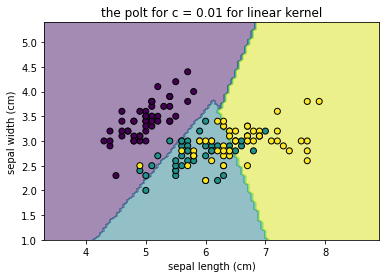

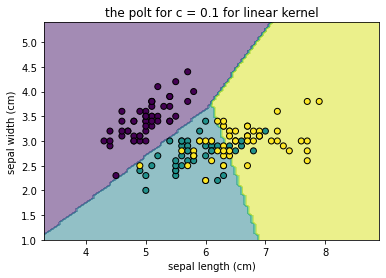

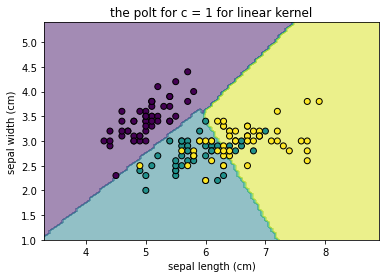

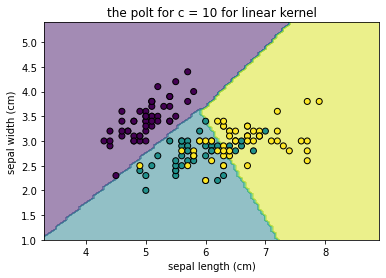

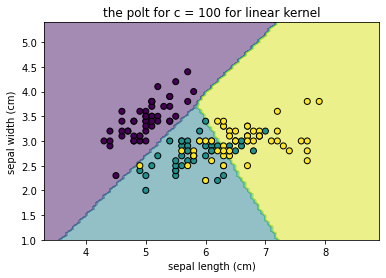

In [43]:
for c in [0.01,0.1,1,10,100]:
    classifier = SVC(kernel='linear',C=c).fit(X,Y)
    disp = DecisionBoundaryDisplay.from_estimator(
        classifier, X, response_method="predict",
        xlabel=iris.feature_names[0], ylabel=iris.feature_names[1],
        alpha=0.5,
    )
    disp.ax_.scatter(X[:, 0], X[:, 1], c=Y, edgecolor="k")
    t = f"the polt for c = {c} for linear kernel"
    plt.title(t)
    plt.savefig(t+f'.png')
    plt.show()

#### for kernel poly 

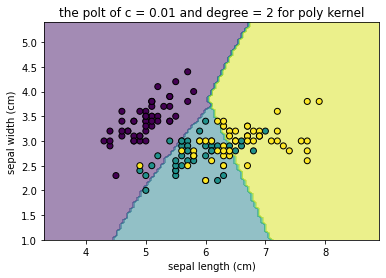

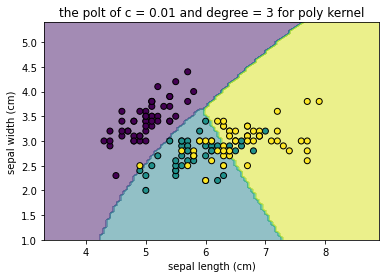

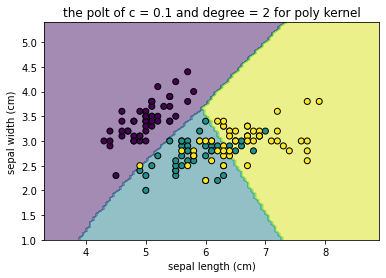

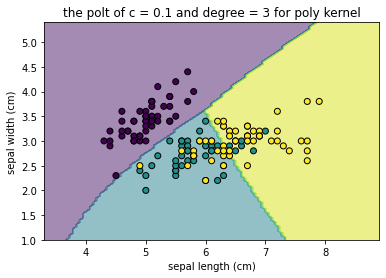

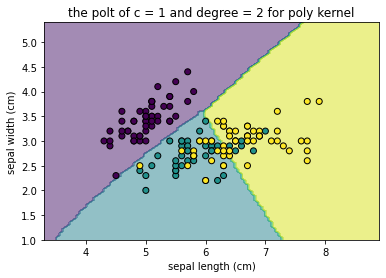

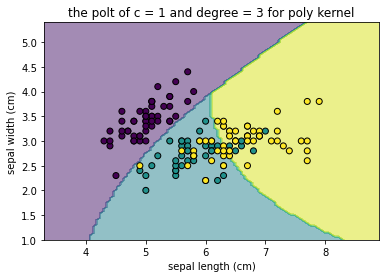

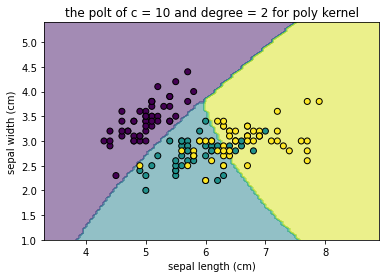

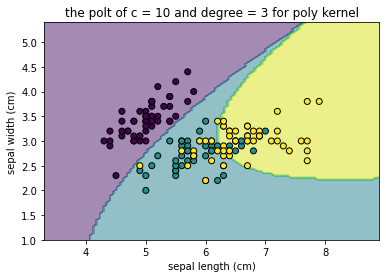

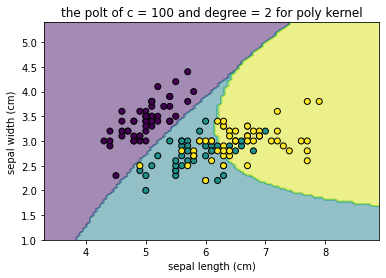

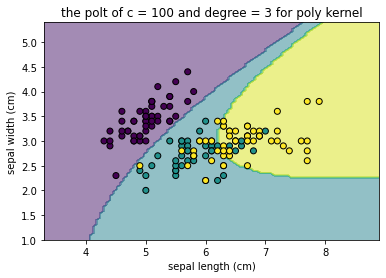

In [44]:
for c in [0.01,0.1,1,10,100]:
    for d in [2,3]:
        classifier = SVC(kernel='poly',C=c,degree = d).fit(X,Y)
        disp = DecisionBoundaryDisplay.from_estimator(
            classifier, X, response_method="predict",
            xlabel=iris.feature_names[0], ylabel=iris.feature_names[1],
            alpha=0.5,
        )
        disp.ax_.scatter(X[:, 0], X[:, 1], c=Y, edgecolor="k")
        t = f"the polt of c = {c} and degree = {d} for poly kernel"
        plt.title(t)
        plt.savefig(t+f'.png')
        plt.show()

#### for kernel rbf

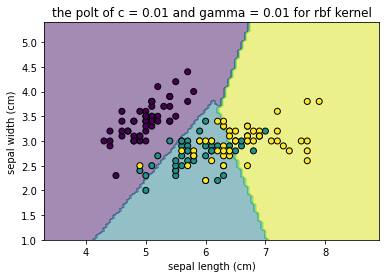

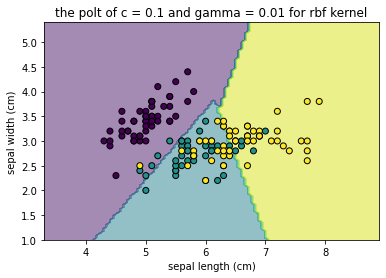

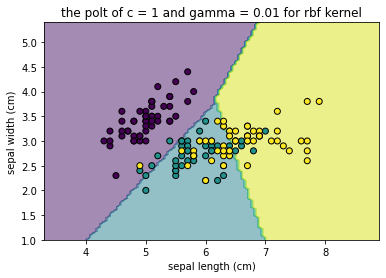

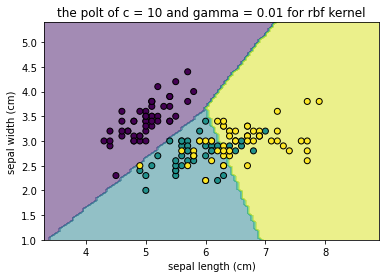

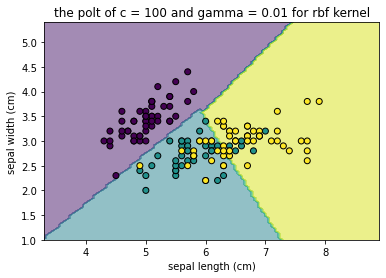

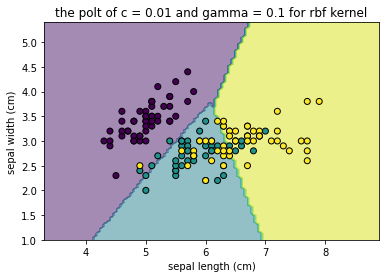

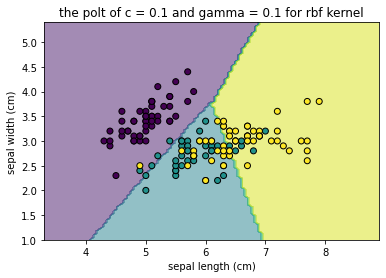

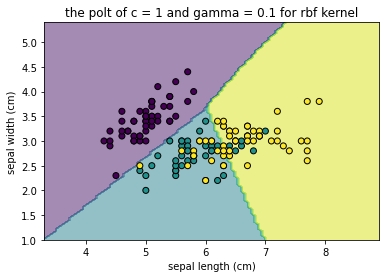

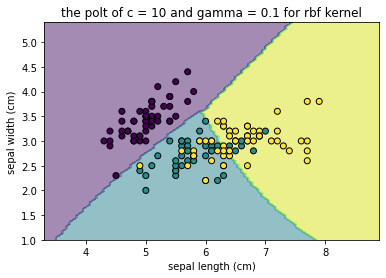

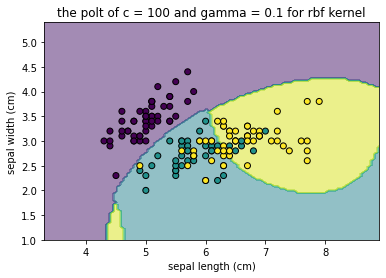

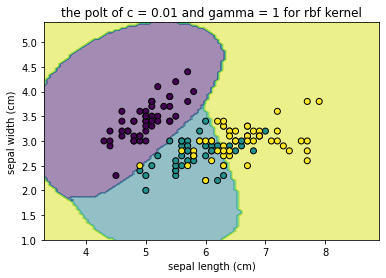

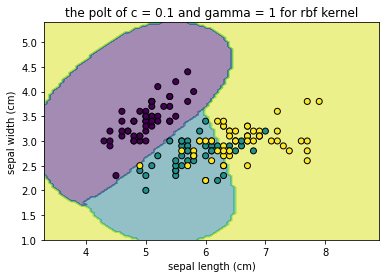

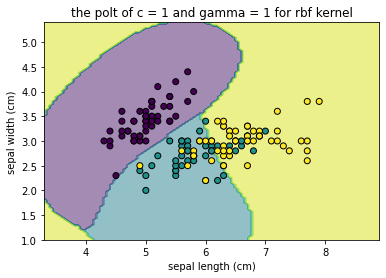

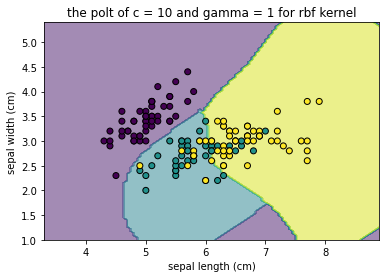

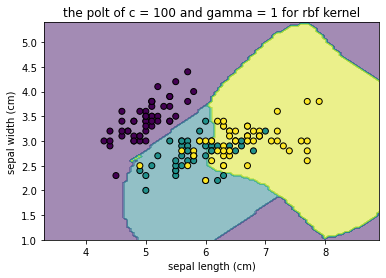

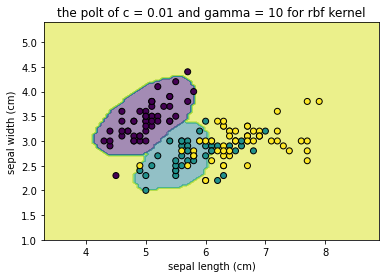

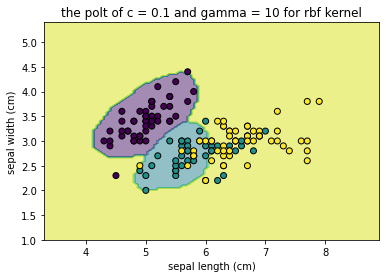

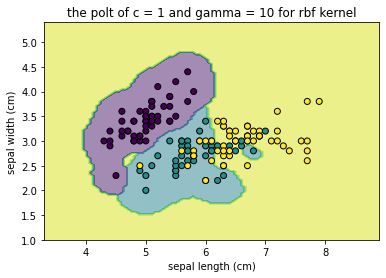

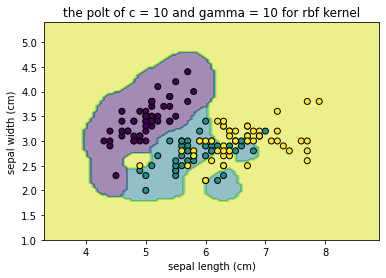

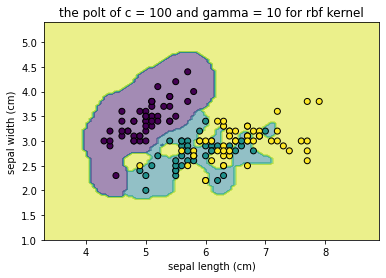

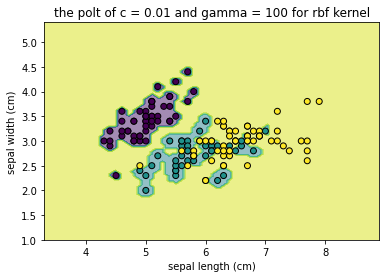

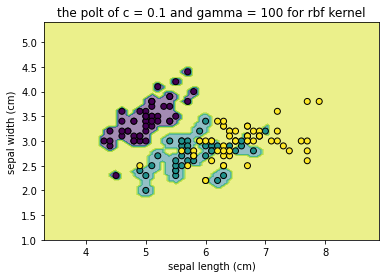

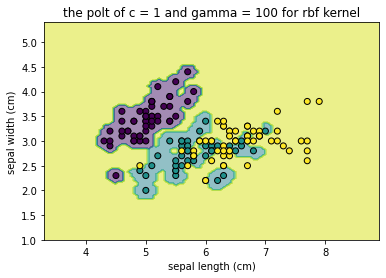

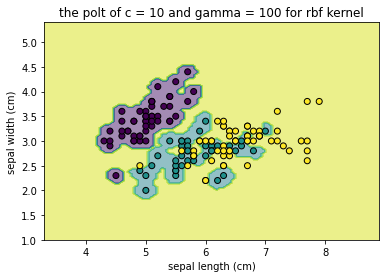

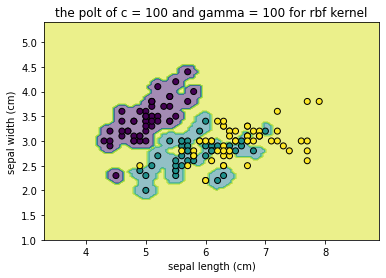

In [45]:
for b in [0.01,0.1,1,10,100]:
    for c in [0.01,0.1,1,10,100]:
        classifier = SVC(kernel='rbf', gamma=b,C=c).fit(X,Y)
        disp = DecisionBoundaryDisplay.from_estimator(
            classifier, X, response_method="predict",
            xlabel=iris.feature_names[0], ylabel=iris.feature_names[1],
            alpha=0.5,
        )
        disp.ax_.scatter(X[:, 0], X[:, 1], c=Y, edgecolor="k")
        t = f"the polt of c = {c} and gamma = {b} for rbf kernel"
        plt.title(t)
        plt.savefig(t+f'.png')
        plt.show()